adam optimizer, 32 and 64 filter, 2 layer, epoch 20

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  plt.grid(True)

In [ ]:
zip_path = '/content/drive/My\ Drive/Bootcamp\ ML2020/dataset/cats-dogs.zip'

!cp {zip_path} /content/

!cd /content/

!unzip -q /content/cats-dogs.zip -d /content

# !rm /content/cats-dogs.zip

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)

model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 200, 200, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 160000)            0         
_________________________________________________________________
dense (Dense)                (None, 128)               20480128  
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [ ]:
dataset_dir = '/content/'

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# datagen = ImageDataGenerator(rescale=1.0/255.0)

train_datagen = ImageDataGenerator(rescale=1.0/255.0, width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_aug_iterator = train_datagen.flow_from_directory(os.path.join(dataset_dir, 'train'), class_mode='binary', batch_size=128, target_size=(200, 200))
test_aug_iterator = test_datagen.flow_from_directory(os.path.join(dataset_dir, 'test'), class_mode='binary', batch_size=128, target_size=(200, 200))

Found 12749 images belonging to 2 classes.
Found 2252 images belonging to 2 classes.


In [ ]:
history_base_model = model.fit_generator(train_aug_iterator, steps_per_epoch=len(train_aug_iterator), validation_data=test_aug_iterator, validation_steps=len(test_aug_iterator), epochs=20)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
100/100 [==============================] - 135s 1s/step - loss: 3.7403 - accuracy: 0.5517 - val_loss: 0.6648 - val_accuracy: 0.5941
Epoch 2/20
100/100 [==============================] - 139s 1s/step - loss: 0.6256 - accuracy: 0.6568 - val_loss: 0.5747 - val_accuracy: 0.6945
Epoch 3/20
100/100 [==============================] - 139s 1s/step - loss: 0.5747 - accuracy: 0.7063 - val_loss: 0.5866 - val_accuracy: 0.6998
Epoch 4/20
100/100 [==============================] - 136s 1s/step - loss: 0.5618 - accuracy: 0.7124 - val_loss: 0.5225 - val_accuracy: 0.7425
Epoch 5/20
100/100 [==============================] - 138s 1s/step - loss: 0.5399 - accuracy: 0.7306 - val_loss: 0.5092 - val_accuracy: 0.7549
Epoch 6/20
100/100 [==============================] - 139s 1s/step - loss: 0.5209 - accuracy: 0.7420 - val_loss: 0.4897 - val_accuracy: 0.7664
Epoch 7/20
100/100 [==============================] - 140s 1s/step

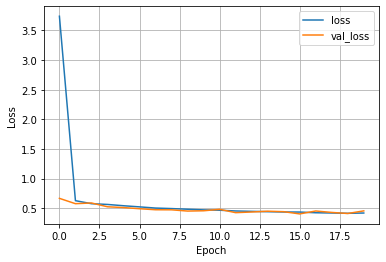

In [ ]:
plot_loss(history_base_model)

**Kesimpulan:** Nilai terbaik yang saya dapat adalah pada Optimizer Adam, menggunakan 2 filter, parameter data generator width_shift_range=0.1 dan height_shift_range=0.1, 20 epoch, saya mendapatkan akurasi sebesar **82%** dan val_loss **40%** pada epoch ke 16